In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the data set
data=pd.read_csv('data/climate_nasa.csv')

In [3]:
data.head(3)

date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...

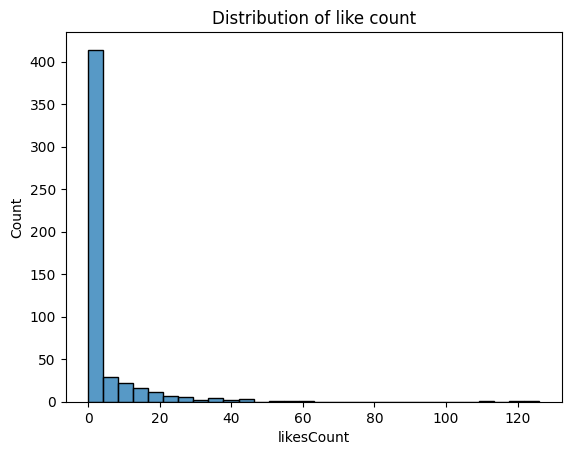

In [4]:
#  visualization
sns.histplot(data['likesCount'],bins=30)
plt.title('Distribution of like count')
plt.show()

Text(0.5, 1.0, 'Comment count Over Time')

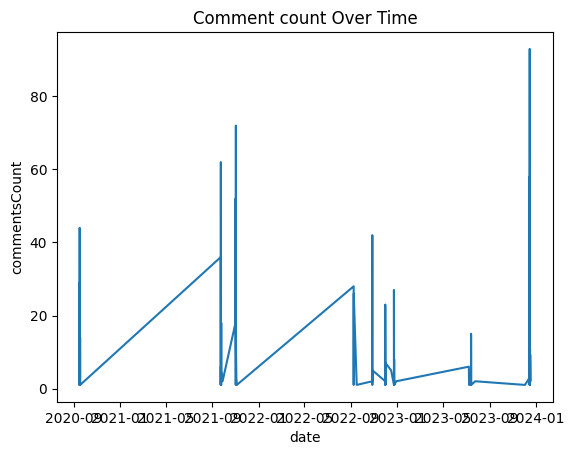

In [5]:
# plot the number of comment over time
data['date']=pd.to_datetime(data['date'])
sns.lineplot(x='date',y='commentsCount',data=data)
plt.title("Comment count Over Time")

In [6]:
data['likesCount'] = pd.to_numeric(data['likesCount'], errors='coerce')
data['commentsCount'] = pd.to_numeric(data['commentsCount'], errors='coerce')

In [7]:
data.head(5)

date  likesCount  \
0 2022-09-07 17:12:32+00:00           2   
1 2022-09-08 14:51:13+00:00           0   
2 2022-09-07 17:19:41+00:00           1   
3 2022-09-08 00:51:30+00:00           4   
4 2022-09-07 19:06:20+00:00          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not harm the Eart...

In [8]:
# Handle missing values by dropping rows with NaNs in 'likesCount' or 'commentsCount'
data.dropna(subset=['likesCount', 'commentsCount'], inplace=True)

In [9]:
data.head(2)

date  likesCount  \
2 2022-09-07 17:19:41+00:00           1   
4 2022-09-07 19:06:20+00:00          16   

                                         profileName  commentsCount  \
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
2  Does the CO2/ghg in the troposphere affect the...  
4  Yes, and carbon dioxide does not harm the Eart...

In [10]:
# Normalize numerical features 
scaler = StandardScaler()
data[['likesCount','commentsCount']]=scaler.fit_transform(data[['likesCount','commentsCount']])

In [11]:
data.head(2)

date  likesCount  \
2 2022-09-07 17:19:41+00:00   -0.425783   
4 2022-09-07 19:06:20+00:00    0.499064   

                                         profileName  commentsCount  \
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...      -0.465380   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...       1.413549   

                                                text  
2  Does the CO2/ghg in the troposphere affect the...  
4  Yes, and carbon dioxide does not harm the Eart...

In [12]:
# split the dateset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2,random_state=42)

In [13]:
train_data

date  likesCount  \
493 2023-12-14 17:17:36+00:00    0.314094   
427 2021-10-31 19:15:08+00:00    3.335262   
166 2020-09-15 22:18:48+00:00   -0.364127   
318 2020-09-16 16:51:08+00:00   -0.425783   
154 2020-09-16 04:43:38+00:00   -0.364127   
..                        ...         ...   
176 2020-09-15 21:36:59+00:00    0.499064   
34  2022-12-15 06:02:09+00:00   -0.302471   
162 2020-09-15 23:03:53+00:00   -0.487440   
362 2023-12-14 18:22:30+00:00   -0.240814   
172 2020-09-15 21:43:00+00:00   -0.240814   

                                           profileName  commentsCount  \
493  eb0a0e7c4cbe74591568494184850546269e26ffd51229...       2.720630   
427  1c544111b75e56596f09053397579f1724dcd7b1ae96f5...       3.537556   
166  385e244a07d1dd161819ef201be1f082dfb975efb18316...       1.086779   
318  75f018df2650246e31195fb38d848c6a34ffcf5125b2d9...      -0.465380   
154  6d604a051b3b54dae361f68fb407051d0e71b8c543144b...      -0.301995   
..                                                 ...            ...   
176  6c5e0b507471c121613153d3459e97b050dd47d1ec744c...      -0.056917   
34   221aa3f8cebda1b9a88453b44701cd578de94311acca47...      -0.301995   
162  ad07c0487a8c84d57f7fba04b48f36ef062fe1f481be83...      -0.628765   
362  ff2c224cefee20e88a2b1d41a7693d6157f02fcdb68bee...      -0.628765   
172  7ad79c47512d814172d417e9c8fca497cae43a542bebe0...      -0.138610   

                                                  text  
493  Yes, but, the U.S. mean temperature anomaly , ...  
427  Too bad we don’t see Oct 1821 or 1721, just ke...  
166  Is there a reason the change escalates so dras...  
318  \nNASA wants you to believe that man is the so...  
154  The VAST majority of Earths history has been a...  
..                                                 ...  
176  The climate is changing but it’s ridiculous to...  
34   Maybe if Fox had investigative journalists the...  
162                               Southern hemisphere?  
362     John Kerry to the rescue with his private jet.  
172  What was the reason for the dust bowl in the19...  

[195 rows x 5 columns]

In [14]:
test_data

date  likesCount  \
61  2023-07-10 15:18:43+00:00   -0.364127   
11  2022-09-07 17:10:34+00:00   -0.425783   
260 2020-09-15 23:41:15+00:00   -0.179158   
435 2022-12-22 17:45:43+00:00    0.560720   
395 2021-10-31 16:02:45+00:00    0.992316   
357 2023-12-15 19:32:02+00:00   -0.179158   
380 2023-12-14 17:37:14+00:00   -0.240814   
202 2021-09-23 02:23:15+00:00   -0.117501   
18  2022-09-07 17:26:16+00:00   -0.487440   
171 2020-09-15 21:57:52+00:00    0.129125   
108 2021-09-23 16:03:59+00:00   -0.487440   
499 2023-12-14 16:31:22+00:00    0.314094   
194 2021-09-23 13:48:22+00:00    0.129125   
358 2023-12-14 16:59:04+00:00   -0.117501   
152 2020-09-16 09:21:02+00:00   -0.240814   
251 2020-09-17 14:39:50+00:00   -0.425783   
397 2021-11-01 15:42:25+00:00    6.911337   
37  2022-11-29 18:39:45+00:00   -0.179158   
136 2020-09-17 02:24:09+00:00   -0.364127   
247 2020-09-17 04:56:23+00:00   -0.425783   
88  2021-09-27 15:22:05+00:00   -0.487440   
46  2022-11-30 04:56:29+00:00   -0.487440   
179 2021-09-23 17:33:32+00:00   -0.487440   
85  2021-09-22 23:33:48+00:00    0.067468   
372 2023-12-14 17:29:18+00:00    1.608880   
198 2021-09-23 13:19:12+00:00   -0.425783   
29  2022-11-30 10:18:53+00:00   -0.240814   
143 2020-09-16 15:15:02+00:00   -0.425783   
280 2020-09-16 01:56:05+00:00   -0.487440   
266 2020-09-16 06:08:13+00:00   -0.425783   
184 2021-09-23 15:35:49+00:00   -0.487440   
445 2022-12-23 02:49:39+00:00   -0.425783   
63  2023-07-24 15:58:50+00:00   -0.425783   
130 2020-09-16 01:51:19+00:00    0.005812   
42  2022-11-29 19:49:25+00:00    0.252438   
197 2021-09-23 13:30:37+00:00   -0.364127   
167 2020-09-15 22:18:44+00:00   -0.364127   
394 2021-10-31 16:30:32+00:00   -0.302471   
244 2020-09-16 01:11:15+00:00   -0.425783   
514 2022-12-22 17:46:40+00:00   -0.425783   
145 2020-09-16 14:09:32+00:00   -0.364127   
213 2022-10-26 16:40:49+00:00    2.842010   
185 2021-09-23 15:25:33+00:00   -0.425783   
39  2022-11-29 18:30:13+00:00   -0.487440   
389 2023-12-15 11:02:48+00:00   -0.302471   
137 2020-09-17 01:40:07+00:00   -0.487440   
332 2020-09-16 09:57:44+00:00   -0.425783   
100 2021-09-23 19:32:26+00:00   -0.425783   
388 2023-12-16 18:20:51+00:00   -0.302471   

                                           profileName  commentsCount  \
61   78e4838d309581b00d26720162b50ed82ab4f66955641e...      -0.628765   
11   f739631316ff10bf3563ed8b74394e9cec90985eb5f432...      -0.220302   
260  f6ed8f13212babcab445115a686a84d7857d1b5ddae12c...      -0.628765   
435  23a6f733194fbef9747c804bc931d76c5977d2a07c9932...      -0.383687   
395  461e201ee5cca5aa3f37e4763e406125f3dace1ac24262...       0.760009   
357  1345d006dc2355fc2bcacc75c71cc3c40f2942a4133aa3...       0.188161   
380  9e17b1a6422032d47472f0216c73aafda7587e302eed5e...      -0.383687   
202  402431175ef450e39a771a8ed1da3f11a769b254b23aa9...      -0.138610   
18   866f4b9252aa97aca2b2aabe8bab34a4161cfaf8da9ea6...      -0.628765   
171  4087c8636725f9349f44fdcd2a7a3a315aae55817189bd...       0.269853   
108  3c5ff2ebf3586a6519f16ac48dd19a33b484033edaa0da...      -0.301995   
499  0751d28b9514a3b89812b8aa70267916944d956a21d51f...       1.331857   
194  b734b67891c1065bae0fef356a86c924bc9b191c0017fe...      -0.220302   
358  750c3e9769a608c8bd8b0b37887ecd59632bc9cfffb8db...      -0.301995   
152  2b733800c0f2bcc54de050e5460cc5878ad85b8ba92c18...       1.331857   
251  8aeea95ecbcc3b29e499cdeb08b4c25828bac77cdf313d...       0.433238   
397  99459d1c18c5166316e5546a6f29c49a7fdfbec7b95d89...       5.171408   
37   58681fb15245b9ce795beee3d7c5c46f04921b4eca8f47...      -0.547072   
136  6076733c3c8d12b325a8b3a2b53a6d1b164c83a4a0d1d4...      -0.628765   
247  509130aae5484607c96f6cb765daabc05dc6324aab025b...      -0.628765   
88   0fad5ee14d79a310ff37ea261e5cb719e1c0d5f41a5f2b...      -0.547072   
46   fce4a0f9af3b46e87482faa63c7a38172e01e1cff06908...      -0.628765   
179  b630dbbdf1eb00bff90a40d1fbfda7913d3b8ed968eb53...      -0.628765   
85   ff1b7fe8e8b2508c5

In [15]:
# Feature Engineering
data['likesCount_MA']=data['likesCount'].rolling(window=7).mean()

In [16]:
data.head(3)

date  likesCount  \
2 2022-09-07 17:19:41+00:00   -0.425783   
4 2022-09-07 19:06:20+00:00    0.499064   
5 2022-09-15 17:10:57+00:00   -0.240814   

                                         profileName  commentsCount  \
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...      -0.465380   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...       1.413549   
5  191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...      -0.628765   

                                                text  likesCount_MA  
2  Does the CO2/ghg in the troposphere affect the...            NaN  
4  Yes, and carbon dioxide does not harm the Eart...            NaN  
5  Excellent example...very relatable to the Gen ...            NaN

In [17]:
# Create rolling averages or other derived features if needed
# Example: Rolling average of likesCount over the past 7 days
data['likesCount_MA'] = data['likesCount'].rolling(window=7).mean()

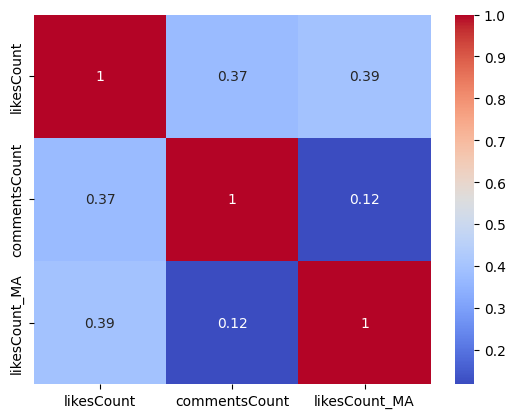

In [18]:
# Drop any remaining non-numeric columns if they exist
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
# Train the model
model = LinearRegression()
model.fit(train_data[['likesCount']], train_data['commentsCount'])

# Make predictions
predictions = model.predict(test_data[['likesCount']])

# Evaluate the model
mse = mean_squared_error(test_data['commentsCount'], predictions)
r2 = r2_score(test_data['commentsCount'], predictions)
print(f'MSE: {mse}, R-squared: {r2}')

MSE: 0.4762665789312798, R-squared: 0.4349823733255326


In [20]:
# Use the model to make future projections (example, this will require a proper 'future_data' input)
future_projections = model.predict(data[['likesCount']])

In [21]:
# Example scenario analysis: Increase likesCount by 10% and predict commentsCount
test_data['likesCount'] *= 1.1
scenario_projections = model.predict(test_data[['likesCount']])


In [22]:
import joblib
# save the model
joblib.dump(model,'model/model.pkl')

['model/model.pkl']

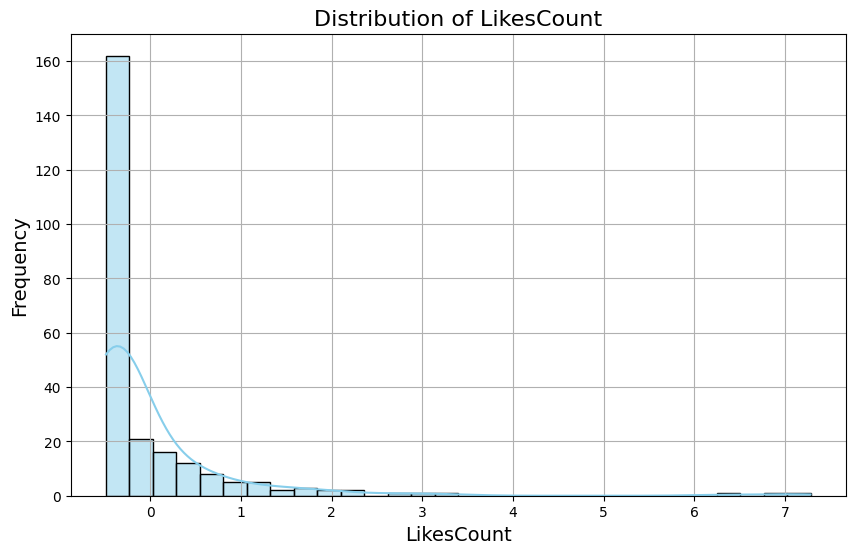

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset


# Plotting the distribution of LikesCount
plt.figure(figsize=(10, 6))
sns.histplot(data['likesCount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of LikesCount', fontsize=16)
plt.xlabel('LikesCount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()



c:\Users\APPLE\Desktop\nikhita\Machine Learning Project\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129440 (\N{MICROBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\APPLE\Desktop\nikhita\Machine Learning Project\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129398 (\N{FREEZING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\APPLE\Desktop\nikhita\Machine Learning Project\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\APPLE\Desktop\nikhita\Machine Learning Project\ML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\APPLE\Desktop\nikhita\Machine Learning Project\ML\Lib\site-package

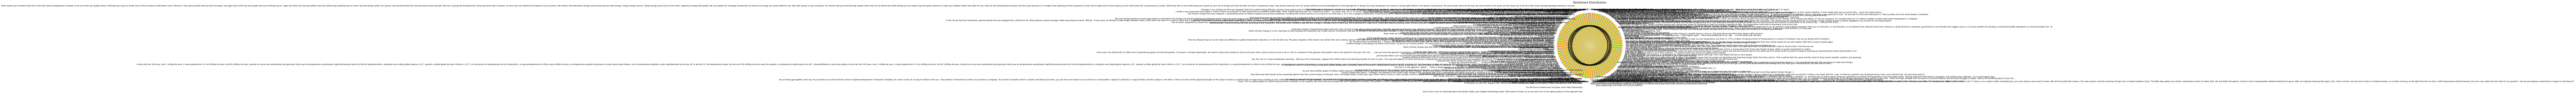

In [24]:
# Assuming the 'Sentiment' column contains values like 'Positive', 'Negative', and 'Neutral'
# Get the value counts for each sentiment category
sentiment_counts = data['text'].value_counts()

# Plotting the pie chart for Sentiment distribution
plt.figure(figsize=(16, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'gold'], startangle=90)
plt.title('Sentiment Distribution', fontsize=16)
plt.show()


In [25]:
data.head(1)

date  likesCount  \
2 2022-09-07 17:19:41+00:00   -0.425783   

                                         profileName  commentsCount  \
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...       -0.46538   

                                                text  likesCount_MA  
2  Does the CO2/ghg in the troposphere affect the...            NaN

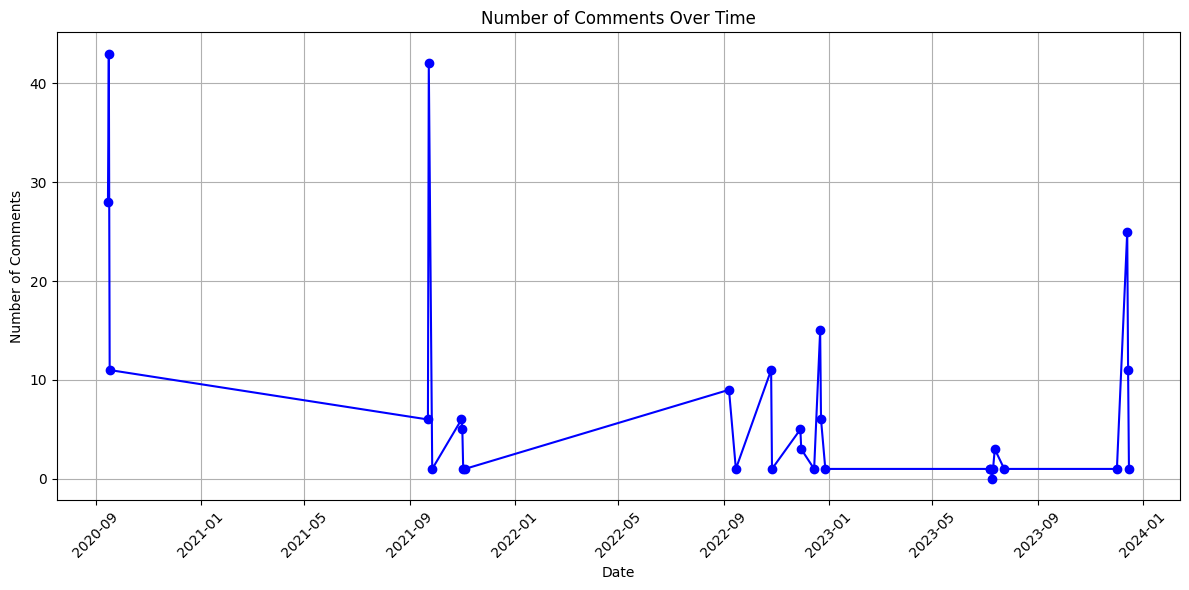

In [27]:
#A line graph or histogram showing the number of comments over time. code

# Group by date and count the number of comments
comments_count = data.groupby(data['date'].dt.date).count()

# Line Graph
plt.figure(figsize=(12, 6))
plt.plot(comments_count.index, comments_count['text'], marker='o', linestyle='-', color='b')
plt.title('Number of Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

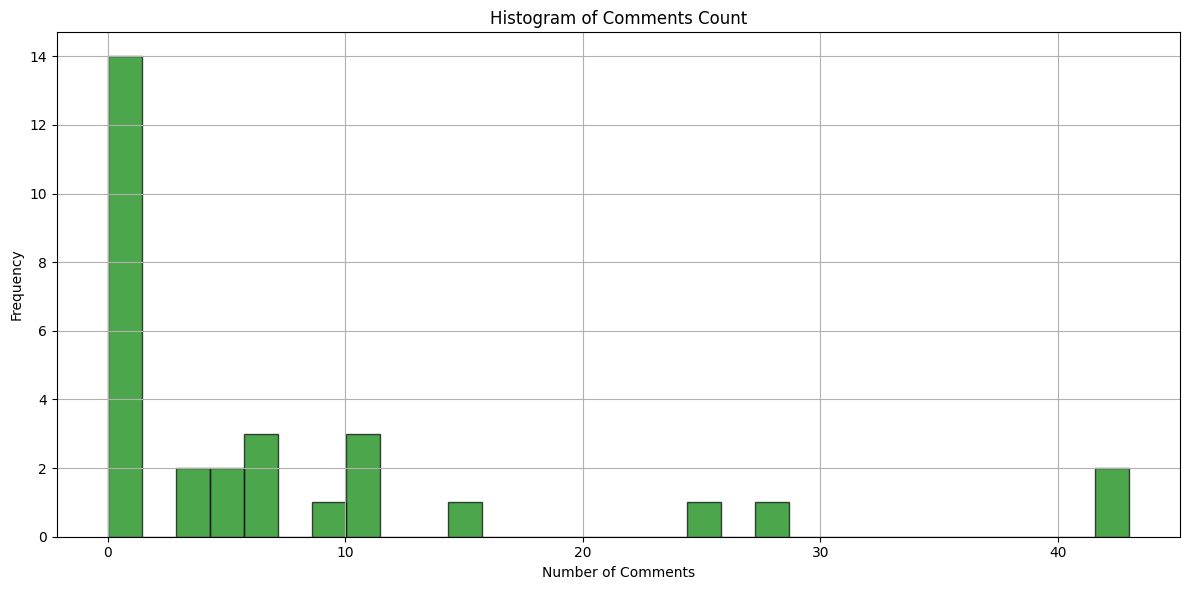

In [28]:
# Histogram (optional)
plt.figure(figsize=(12, 6))
plt.hist(comments_count['text'], bins=len(comments_count.index), alpha=0.7, color='g', edgecolor='black')
plt.title('Histogram of Comments Count')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

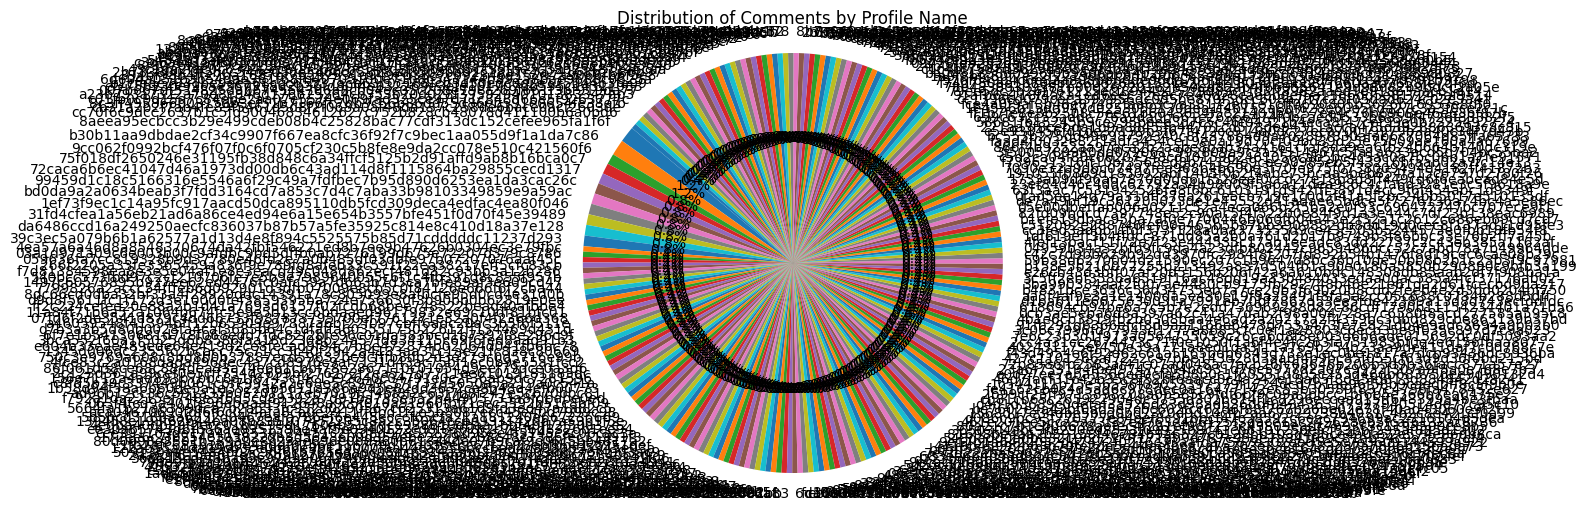

In [29]:
# Count the number of comments by ProfileName
comments_distribution = data['profileName'].value_counts()

# Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(comments_distribution, labels=comments_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Comments by Profile Name')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

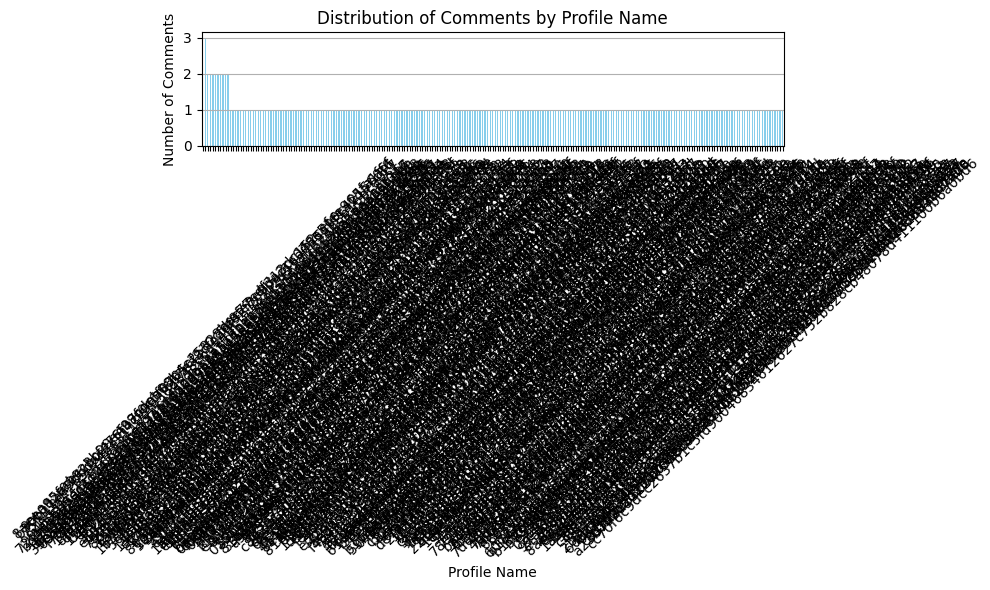

In [30]:
# Bar Graph
plt.figure(figsize=(10, 6))
comments_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Comments by Profile Name')
plt.xlabel('Profile Name')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

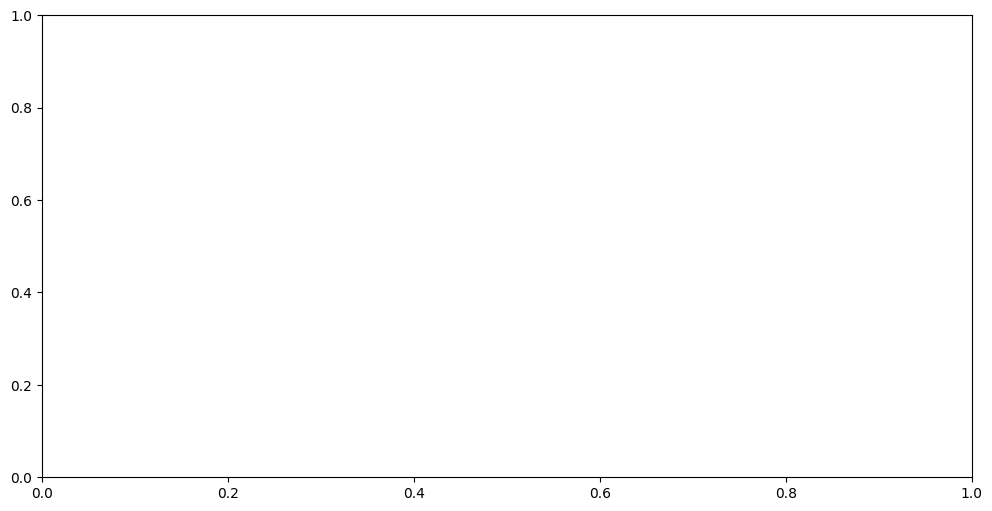

In [33]:
# A bar chart comparing CommentsCount across various comments.

# Bar Chart comparing CommentsCount across various comments
plt.figure(figsize=(12, 6))
plt.bar(data['text'], data['commentsCount'], color='skyblue')
plt.title('Comparison of Comments Count Across Various Comments')
plt.xlabel('Number of Responses (CommentsCount)')
plt.ylabel('Comments')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()